# Facebook Prophet

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from fbprophet import Prophet
from prophet.diagnostics import performance_metrics

In [2]:
# Importing the data set
df = pd.read_excel('data/eth_api_data.xlsx')

#Setting up naming conventions for Prophet
df.rename(columns={'t': 'ds', 'price_usd_close': 'y'}, inplace=True)
df

,ds,count,sending_count,receiving_count,active_count,new_non_zero_count,block_height,sopr,y,marketcap_usd,difficulty_latest,hash_rate_mean
0,2015-08-08,10641,582,439,800,353,55869,0.459823,0.769981,8.983510e+07,1606016380751,9.644985e+10
1,2015-08-09,10894,457,489,731,253,60992,0.403942,0.719830,5.507245e+07,1741399466631,1.013969e+11
2,2015-08-10,11543,804,749,997,649,66247,0.360587,0.700705,4.878861e+07,1948102094734,1.116431e+11
3,2015-08-11,13432,2119,2106,2339,1889,71527,0.614763,1.088361,5.745360e+07,2171897473895,1.240757e+11
4,2015-08-12,13744,565,673,904,312,76651,0.609176,1.214071,8.079017e+07,2248237602936,1.308930e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
2218,2021-09-07,127525454,236234,305676,512946,101753,13181722,1.039874,3423.552440,4.329657e+11,8709230357431330,6.494343e+14
2219,2021-09-08,127614096,209233,288408,476723,88642,13188217,1.030869,3490.893336,4.037077e+11,8877905505209530,6.629633e+14
2220,2021-09-09,127707457,217560,290503,481475,93361,13194683,1.035343,3428.141046,4.098615e+11,9039992063016280,6.562142e+14
2221,2021-09-10,127802200,252036,283405,517875,94743,13201142,1.014722,3212.099640,3.949930e+11,9058536219278930,6.606451e+14


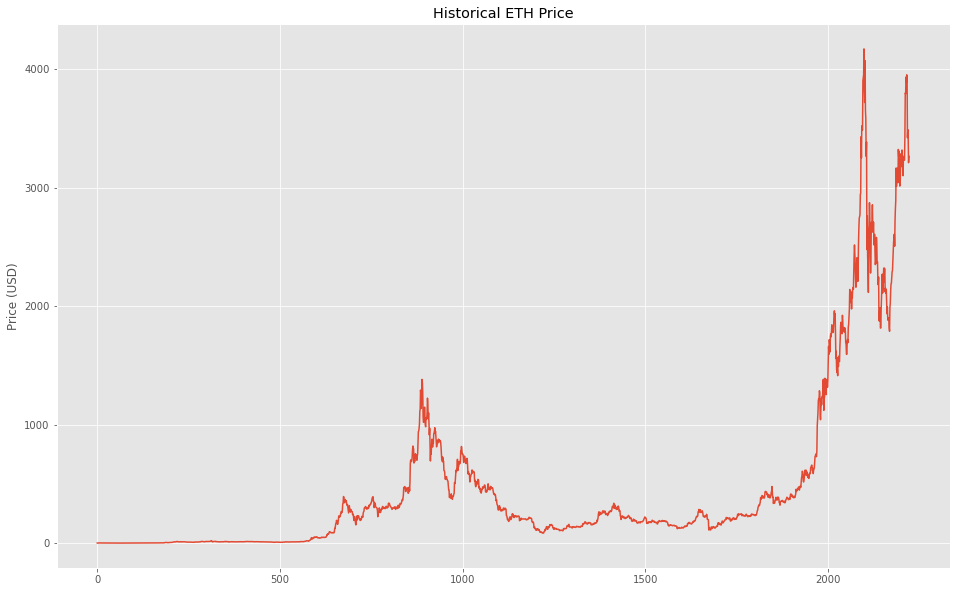

In [3]:
# Plotting historical ETH prices
df.y.plot(figsize=(16,10))

plt.xlabel('')
plt.ylabel('Price (USD)')
plt.title('Historical ETH Price')
plt.show();

In [4]:
# Instantiating the Prophet model
model = Prophet(interval_width=0.95)

# Fitting the model to the data set
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
# Setting up a variable for making predictions 30 days out
future = model.make_future_dataframe(periods=30, freq='D')
future.tail()

,ds
2248,2021-10-07
2249,2021-10-08
2250,2021-10-09
2251,2021-10-10
2252,2021-10-11


In [6]:
# Making the predictions
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2248,2021-10-07,3233.210136,2729.739179,3459.003874,3213.855487,3247.962966,-115.219615,-115.219615,-115.219615,-1.588703,-1.588703,-1.588703,-113.630912,-113.630912,-113.630912,0.0,0.0,0.0,3117.990520
2249,2021-10-08,3240.202709,2737.417039,3461.087830,3219.460727,3255.758296,-115.126130,-115.126130,-115.126130,-1.108837,-1.108837,-1.108837,-114.017293,-114.017293,-114.017293,0.0,0.0,0.0,3125.076579
2250,2021-10-09,3247.195283,2761.657051,3523.638806,3225.416727,3263.553627,-114.112796,-114.112796,-114.112796,0.291039,0.291039,0.291039,-114.403835,-114.403835,-114.403835,0.0,0.0,0.0,3133.082487
2251,2021-10-10,3254.187856,2799.511284,3515.598635,3231.372727,3271.348957,-114.469200,-114.469200,-114.469200,0.344597,0.344597,0.344597,-114.813798,-114.813798,-114.813798,0.0,0.0,0.0,3139.718656
2252,2021-10-11,3261.180430,2765.367601,3531.803398,3237.328726,3279.172738,-114.051505,-114.051505,-114.051505,1.216043,1.216043,1.216043,-115.267549,-115.267549,-115.267549,0.0,0.0,0.0,3147.128924


### Plotting Values
* Blue Line = Forecasted Values
* Black Dots = Observed Values
* Uncertainty Invervals = Blue Shaded Region

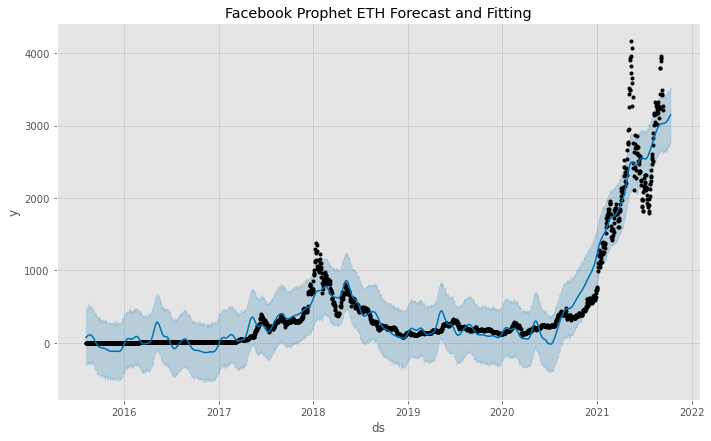

In [7]:
model.plot(forecast, uncertainty=True)
plt.title('Facebook Prophet ETH Forecast and Fitting')
plt.savefig('images/fb_prophet_fc_fit.png')
plt.show()

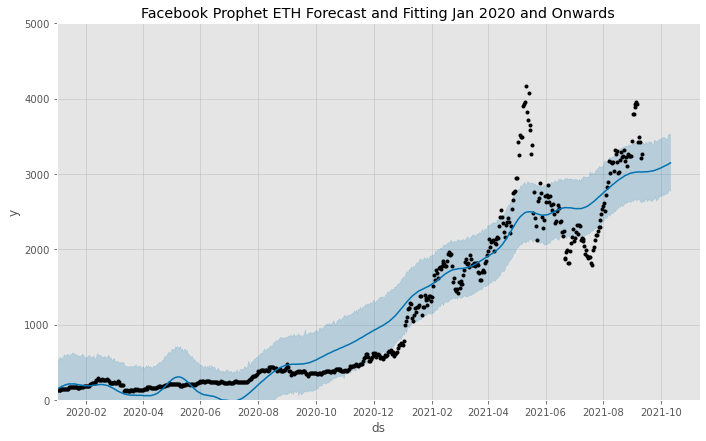

In [8]:
# Zooming in on the above graph
model.plot(forecast, uncertainty=True)

plt.title('Facebook Prophet ETH Forecast and Fitting Jan 2020 and Onwards')
plt.xlim('2020-01-01', '2021-11-11')
plt.ylim([0, 5000])
plt.savefig('images/fb_prophet_fc_zoomed.png')
plt.show()

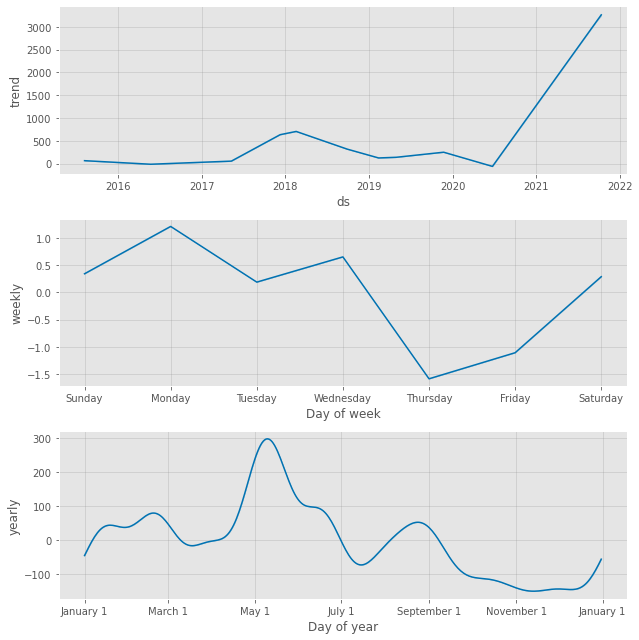

In [9]:
# Plotting components of the forecasts
model.plot_components(forecast)
plt.show();